<a href="https://colab.research.google.com/github/cagBRT/Confusion-matrix/blob/master/confusionMatrix6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/Confusion-matrix.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 89 (delta 47), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (89/89), done.
/content/cloned-repo/cloned-repo
confusionMatrix1.ipynb	confusionMatrix3.png	confusionMatrix6.png
confusionMatrix1.png	confusionMatrix4.ipynb	confusionMatrix7.png
confusionMatrix2.ipynb	confusionMatrix4.png	confusionMatrix8.png
confusionMatrix2.png	confusionMatrix5.ipynb	confusionMatrix9.png
confusionMatrix3.ipynb	confusionMatrix5.png	README.md


In [8]:
from IPython.display import Image
def page(num):
    return Image("confusionMatrix"+str(num)+ ".png" , width=640)

# **AUC-ROC**
(Area Under Curve - Receiver Operating Characteristic)

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. <br>
ROC is a probability curve <br>
AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. 

Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. For example: <br>
>The higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR (True Positive Rate) against the FPR (False Positive Rate) where TPR is on y-axis and FPR is on the x-axis.

**An excellent model has AUC near 1** which means it has good measure of separability. <br>
**A poor model has AUC near 0** which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. <br>
**When AUC is 0.5, it means model has no class separation capacity** whatsoever.

Red distribution curve is of the positive class (patients with disease) and green distribution curve is of negative class(patients with no disease).

This is an ideal situation. When two curves don’t overlap at all means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.


In [6]:
page(11)

ROC is a curve of probability. So lets plot the distributions of those probabilities:

In [2]:
page(12)

Object `(12)` not found


When two distributions overlap, we introduce type 1 and type 2 error. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is 70% chance that model will be able to distinguish between positive class and negative class.


In [ ]:
page(13)

In [ ]:
page(14)

This is the worst situation. When AUC is approximately 0.5, model has no discrimination capacity to distinguish between positive class and negative class.

In [ ]:
page(15)

In [ ]:
page(16)

When AUC is approximately 0, model is actually reciprocating the classes. It means, model is predicting negative class as a positive class and vice versa.

In [ ]:
page(17)

In [ ]:
page(18)

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

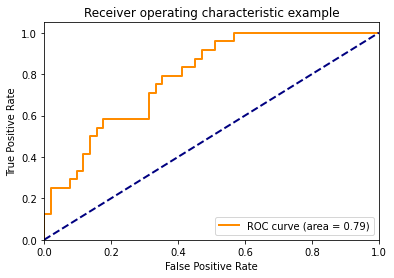

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Plot ROC curves for the multilabel problem

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


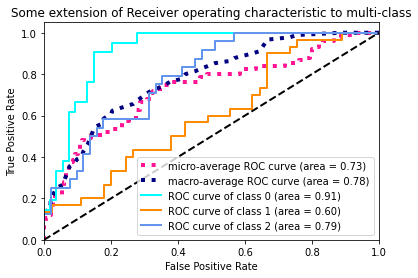

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Area under ROC for the multiclass problem

In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.767722 (macro),
0.748802 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.767722 (macro),
0.748802 (weighted by prevalence)


https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#area-under-roc-for-the-multiclass-problem